In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

origin_image shape (987, 683, 3)


Text(0.5,1,'origin image')

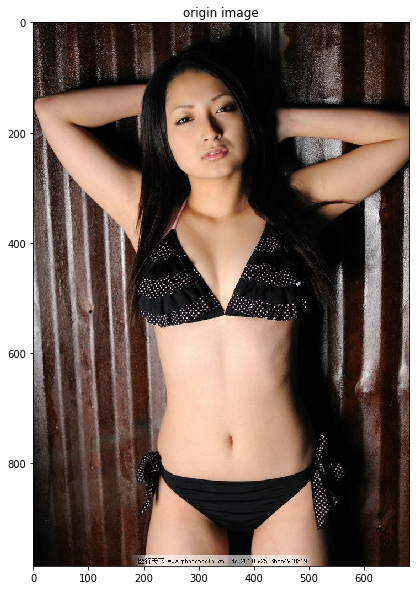

In [2]:
origin_image = cv2.imread('images/color_image.jpg')
# opencv以BGR模式加载彩色图片，而matplotlib以RGB模式显示，需转换
origin_image = cv2.cvtColor(origin_image, cv2.COLOR_BGR2RGB)
#grayImage = cv2.cvtColor(origin_image,cv2.COLOR_BGR2GRAY) #灰度变换 
print('origin_image shape',origin_image.shape)
#显示图像
plt.figure(figsize=(20,10))
plt.imshow(origin_image)
plt.title("origin image")

In [3]:
# 添加椒盐噪声的函数
# srcImage 源图片
# 加噪百分比
# return noiseImg 加完椒盐噪声的图片
def SaltAndPepperNoise(srcImage,percentage):
    noiseImg = srcImage
    #print(noiseImg[0,0])
    #noiseImg[0,0] = 0
    #print(noiseImg[0,0])
    noiseNum = int(percentage * srcImage.shape[0] * srcImage.shape[1])
    print('noiseNum %s' % (noiseNum))
    for i in range (noiseNum):
        randX=np.random.randint(0,srcImage.shape[0]) 
        randY=np.random.randint(0,srcImage.shape[1]) 
        randInt = np.random.randint(0,2)
#         print('randInt',randInt)
        if randInt == 0:
            noiseImg[randX,randY] = 0
        else:
            noiseImg[randX,randY] = 255
    return noiseImg

In [4]:
saltAndPepperImage = SaltAndPepperNoise(origin_image, 0.03)


noiseNum 20223


In [5]:
def GaussianNoise(srcImage,percentage):
    noiseImg = srcImage
    noiseNum = int(percentage * srcImage.shape[0] * srcImage.shape[1])
    print('noiseNum %s' % (noiseNum))
    for i in range (noiseNum):
        randX=np.random.randint(0,srcImage.shape[0]) 
        randY=np.random.randint(0,srcImage.shape[1]) 
        noiseImg[randX,randY] = 255
    return noiseImg

In [6]:
gaussianImage = GaussianNoise(origin_image, 0.03)


noiseNum 20223


In [7]:
meanFilter = np.array([[1,1,1],
                        [1,1,1],
                        [1,1,1]])
count = meanFilter.shape[1] * meanFilter.shape[1]
print(count)

9


In [8]:
#r,g,b = cv2.split(saltAndPepperImage)

In [9]:
def smoothing(image,filter):
    count = filter.shape[1] * filter.shape[1]
    rows,cols = image.shape[0],image.shape[1]
    imageArray = np.zeros( (rows-2,cols-2,3), dtype=np.int16 )
    for i in range(rows-2):
        rowArray = np.zeros( (1,cols - 2) )
        for j in range(cols-2):
            a_slice = image[i:i+3,j:j+3,:] 
            s = np.multiply(a_slice,filter) 
            s = np.sum(s,axis=1)
            s = np.sum(s,axis=0)
            s =  np.multiply(s,1/count)
            r,g,b=np.int(s[0]),np.int(s[1]),np.int(s[2])  
            imageArray[i][j] = [r,g,b]
    print(imageArray.shape)
    return imageArray
    
    

In [10]:
handledGaussianImage = smoothing(gaussianImage,meanFilter)


rows= 987, cols=683
(985, 681, 3)


rows= 987, cols=683
(985, 681, 3)


Text(0.5,1,'handled saltand pepper image')

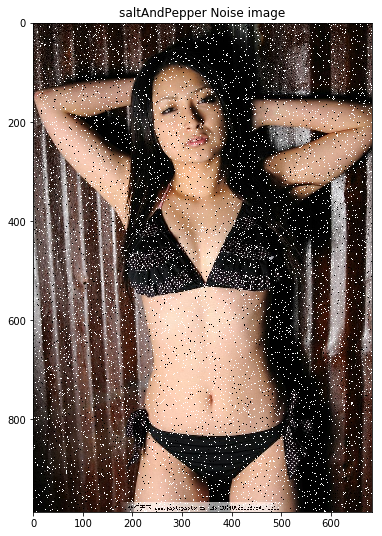

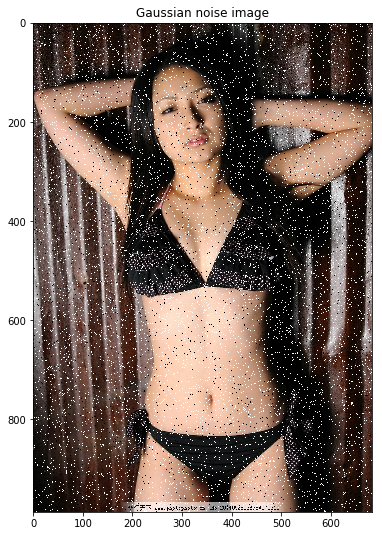

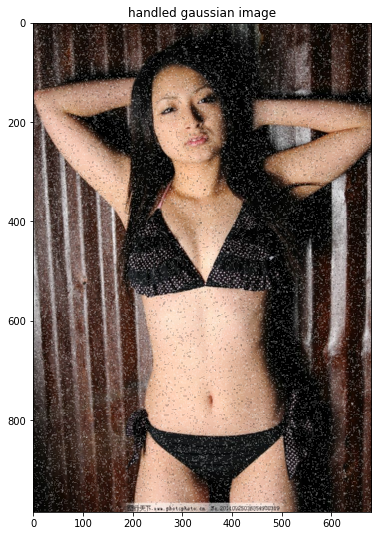

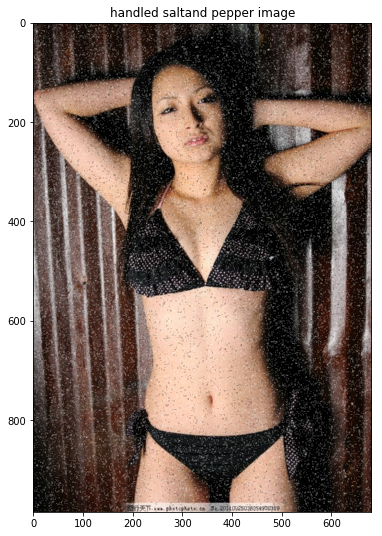

In [23]:
handledSPImage = smoothing(saltAndPepperImage,meanFilter)


plt.figure(figsize=(18,9))
#plt.subplot(2, 2, 1)
plt.imshow(saltAndPepperImage)
plt.title("saltAndPepper Noise image")

plt.figure(figsize=(18,9))
#plt.subplot(2, 2, 2)
plt.imshow(gaussianImage)
plt.title("Gaussian noise image")

plt.figure(figsize=(18,9))
#plt.subplot(2, 2, 3)
plt.imshow(handledGaussianImage)
plt.title("handled gaussian image")

plt.figure(figsize=(18,9))
#plt.subplot(2, 2, 4)
plt.imshow(handledSPImage)
plt.title("handled saltand pepper image")

In [12]:
def zero_pad(X,pad):
    X_paded = np.pad(X,( (0,0), #样本数，不填充 
                        (pad,pad), #图像高度,你可以视为上面填充x个，下面填充y个(x,y) 
                        (pad,pad), #图像宽度,你可以视为左边填充x个，右边填充y个(x,y) 
                        (0,0)), #通道数，不填充 
                     'constant', constant_values=0) #连续一样的值填充 
    return X_paded


blur_image shape (255, 256, 3)


Text(0.5,1,'blurred image')

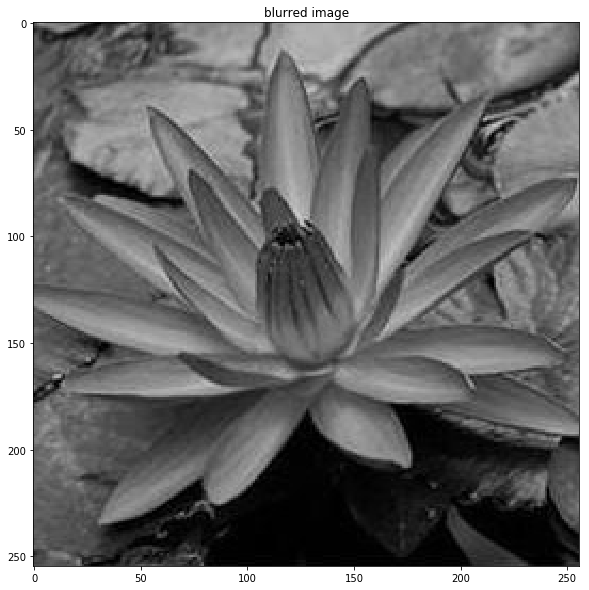

In [32]:
blur_image = cv2.imread('images/blur_image.jpg')
# opencv以BGR模式加载彩色图片，而matplotlib以RGB模式显示，需转换
blur_image = cv2.cvtColor(blur_image, cv2.COLOR_BGR2RGB)
#grayImage = cv2.cvtColor(origin_image,cv2.COLOR_BGR2GRAY) #灰度变换 
print('blur_image shape',blur_image.shape)
#显示图像
plt.figure(figsize=(20,10))
plt.imshow(blur_image)
plt.title("blurred image")
    

In [46]:
def sharpen(image,filter):
    count = filter.shape[1] * filter.shape[1]
    rows,cols = image.shape[0],image.shape[1]
    imageArray = np.zeros( (rows-2,cols-2,3), dtype=np.int16 )
    for i in range(rows-2):
        rowArray = np.zeros( (1,cols - 2) )
        for j in range(cols-2):
            a_slice = image[i:i+3,j:j+3,:] 
            s = np.multiply(a_slice,filter) 
            s = np.sum(s,axis=1)
            s = np.sum(s,axis=0)
            
            s =  np.multiply(s,1/count)
            s = s + 254
            
            r,g,b=np.int(s[0]),np.int(s[1]),np.int(s[2])
            if i < 5 and j < 5:
                print('r=%s,g=%s,b=%s'%(r,g,b))
                #print(s)
            imageArray[i][j] = [r,g,b]
    print(imageArray.shape)
    return imageArray

r=342,g=85,b=342
r=358,g=39,b=358
r=371,g=6,b=371
r=375,g=3,b=375
r=374,g=17,b=374
r=322,g=123,b=322
r=333,g=92,b=333
r=341,g=68,b=341
r=344,g=68,b=344
r=346,g=78,b=346
r=309,g=146,b=309
r=316,g=119,b=316
r=319,g=113,b=319
r=314,g=132,b=314
r=312,g=152,b=312
r=311,g=137,b=311
r=315,g=118,b=315
r=309,g=131,b=309
r=297,g=173,b=297
r=290,g=202,b=290
r=322,g=108,b=322
r=321,g=104,b=321
r=308,g=136,b=308
r=292,g=187,b=292
r=285,g=212,b=285


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(253, 254, 3)


Text(0.5,1,'blurred image')

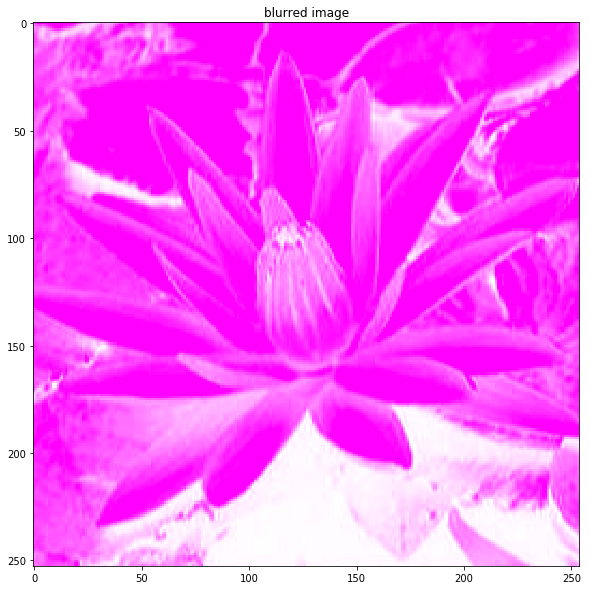

In [47]:

laplacianFilter = np.array([[1,1,1],
                        [1,-8,1],
                        [1,1,1]])
count = laplacianFilter.shape[1] * laplacianFilter.shape[1]
handledBlurImage = sharpen(blur_image,laplacianFilter)
#print(handledBlurImage)
plt.figure(figsize=(20,10))
plt.imshow(handledBlurImage)
plt.title("blurred image")